In [711]:
import pylab
import numpy as np
%pylab inline
from halotools.empirical_models import Zheng07 , model_defaults
from astropy.table import Table
import plotting
from plotting import prettyplot
prettyplot()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [587]:
model = Zheng07(threshold = -21)
data = np.loadtxt("richness.dat")
model.param_dict

{'alpha': 1.15,
 'logM0': 11.92,
 'logM1': 13.94,
 'logMmin': 12.79,
 'sigma_logM': 0.39}

In [588]:
def richness(group_id):
    gals = Table()
    gals['groupid'] = group_id
    gals['dummy'] = 1
    grouped_table = gals.group_by('groupid')
    grp_richness = grouped_table['dummy'].groups.aggregate(np.sum)
    return grp_richness

In [232]:
model2 = Zheng07(threshold=-21)
model2.param_dict["logM0"] = 12.1

In [233]:
model.populate_mock()
model2.populate_mock()

In [234]:
g2 = model2.mock.compute_fof_group_ids()
g1 = model.mock.compute_fof_group_ids()

In [589]:
bins = np.arange(1,61,1)

In [590]:
np.histogram(data,bins)

(array([5830, 1542,  560,  253,  135,   73,   44,   37,   18,   18,   13,
           9,    3,    4,    4,    3,    3,    2,    1,    2,    2,    1,
           1,    0,    0,    0,    1,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60]))

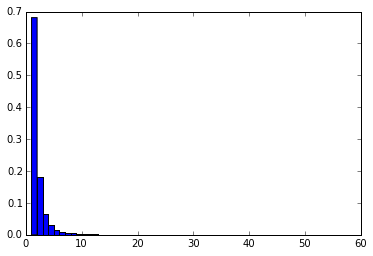

In [221]:
x = plt.hist(data , bins , normed="True")[0]


(59,)


(array([  6.81074766e-01,   1.80140187e-01,   6.54205607e-02,
          2.95560748e-02,   1.57710280e-02,   8.52803738e-03,
          5.14018692e-03,   4.32242991e-03,   2.10280374e-03,
          2.10280374e-03,   1.51869159e-03,   1.05140187e-03,
          3.50467290e-04,   4.67289720e-04,   4.67289720e-04,
          3.50467290e-04,   3.50467290e-04,   2.33644860e-04,
          1.16822430e-04,   2.33644860e-04,   2.33644860e-04,
          1.16822430e-04,   1.16822430e-04,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.16822430e-04,
          1.16822430e-04,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

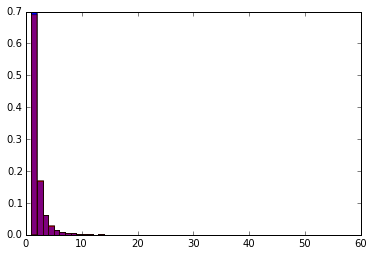

In [269]:
y = np.histogram(richness(g2),bins , normed="True")[0]
yy = plt.hist(richness(g2),bins , normed="True")[0]
print yy.shape
z = plt.hist(richness(g1),bins , normed="True" , color = "r" , alpha = .5)[0]
np.histogram(data,bins,normed="True")

In [264]:
list_r = []
model = Zheng07(threshold = -21)
for i in xrange(100):
    model.populate_mock()
    gid = model.mock.compute_fof_group_ids()
    x = np.histogram(richness(gid),bins , normed="True")[0]
    list_r.append(x)
    

(100, 59)


<matplotlib.colorbar.Colorbar instance at 0x7fb6fd3df1b8>

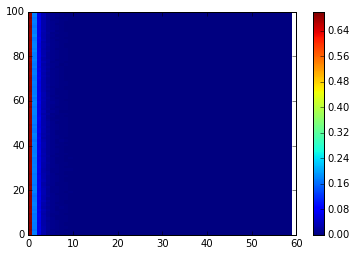

In [270]:
d_r = np.array(list_r)
print d_r.shape
plt.pcolor(d_r)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x7fb6e779d950>

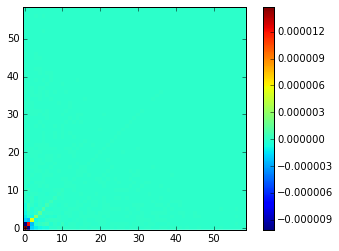

In [591]:
plt.imshow(np.cov(d_r.T), interpolation = "None" , origin = "lower")
plt.colorbar()


In [273]:
C_diag =  np.diag(np.cov(d_r.T))+1.e-11

In [292]:
np.sum(((np.mean(d_r,axis=0)-y)**2./C_diag)[10:])

54.85047045868302

In [291]:
np.sum(((np.mean(d_r,axis=0)-z)**2./C_diag)[10:])

48.568792671390725

In [276]:
data_richness = np.mean(d_r,axis=0)

In [277]:
variance = C_diag
variance.shape , data_richness.shape

((59,), (59,))

In [278]:
covariance = np.cov(d_r.T)

In [279]:
np.savetxt("data_richness.dat" , data_richness)

In [280]:
np.savetxt("covariance_richness.dat" , covariance)

In [281]:
np.savetxt("variance_richness.dat" , variance)

In [301]:
zhengerror = np.array([3.46285183e+03, 1.64749125e+03, 7.80527281e+02,
                      3.30492728e+02, 1.38927882e+02, 5.91026616e+01,
                      2.45091664e+01, 1.10830722e+01, 5.76577829e+00,
                      3.14415063e+00, 1.88664838e+00, 1.07786531e+00,
                      5.54622962e-01, 2.87849970e-01])


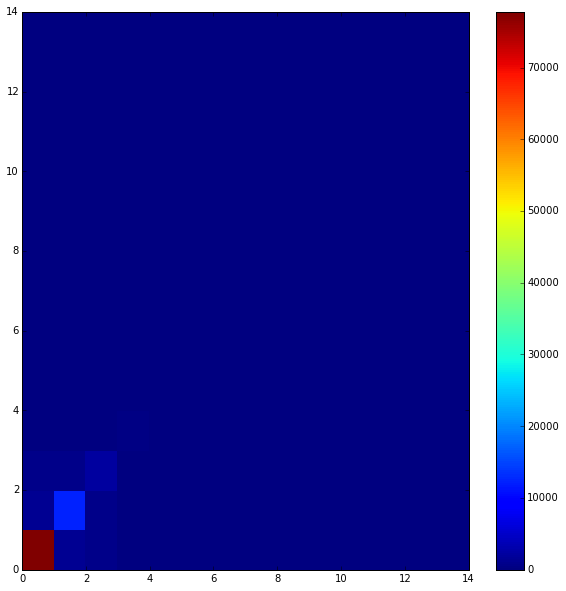

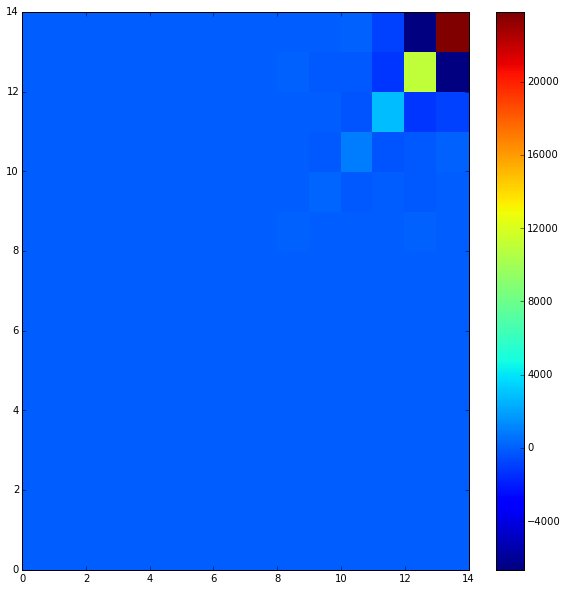

[  7.77902050e+04   1.22017943e+04   2.10972985e+03   3.01345792e+02
   5.46276177e+01   9.68773060e+00   1.36126685e+00   1.96206242e-01
   2.70759896e-02   5.22624299e-03   1.51568697e-03   5.11665528e-04
   1.44225424e-04   5.85306759e-05]
[  2.75083456e+02   1.07295323e+02   4.31948728e+01   1.54787874e+01
   6.42202598e+00   2.57068025e+00   9.41583585e-01   3.68480210e-01
   1.46869395e-01   6.39425303e-02   3.39863300e-02   1.89939479e-02
   9.52064833e-03   6.48109302e-03]


In [508]:
covariance = np.cov(xr.T)
pylab.pcolor(covariance)
pylab.colorbar()
pylab.show()

icov = np.linalg.inv(covariance)
icov2 = np.linalg.solve(covariance , np.eye(14))
pylab.savetxt("inverse_clustering_covariance.dat" , icov2)
pylab.pcolor(icov)
pylab.colorbar()
pylab.show()
err = (np.diag(icov2))**-.5
print np.diag(covariance)
print err

In [316]:
m = Zheng07(threshold = -21)

In [319]:
m.param_dict["alpha"] = 2.

In [320]:
m.populate_mock()

In [321]:
r , x = m.mock.compute_galaxy_clustering()
rr , xx = model.mock.compute_galaxy_clustering()

[  0.12239095   0.17719995   0.25655347   0.37144299   0.53778224
   0.77861137   1.12728837   1.63210958   2.36299934   3.42119545
   4.95327193   7.17144145  10.38294952  15.03263208]


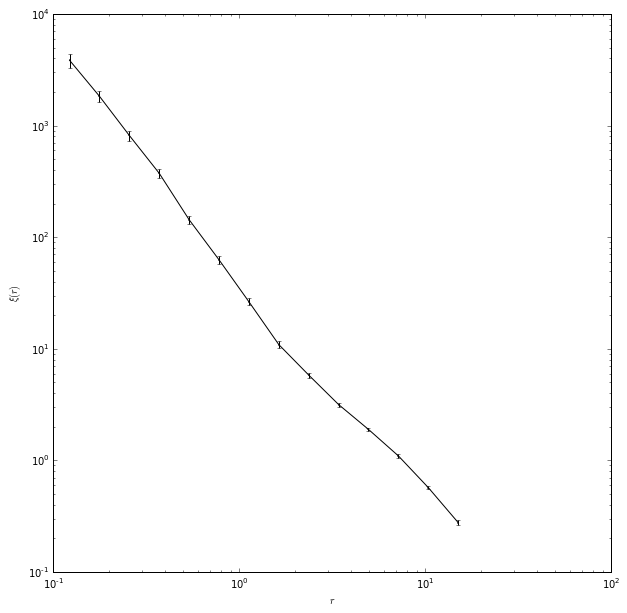

In [609]:
print rr
pylab.figure(figsize(10,10))
pylab.errorbar(rr , xx , yerr = 2. * err , fmt="-ok", ms=1,
            capsize=2, alpha=1.)

pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("$r$")
pylab.ylabel("$\\xi (r)$")
#pylab.xlim((,16))


In [315]:
model.param_dict

{'alpha': 1.15,
 'logM0': 11.92,
 'logM1': 13.94,
 'logMmin': 12.79,
 'sigma_logM': 0.39}

In [362]:
m = np.logspace(11,16, 100)
from scipy.special import erf

In [363]:
def mean_central(M):
    logMmin = model.param_dict["logMmin"]
    sigma = model.param_dict["sigma_logM"]
    return .5 * (1. + erf((np.log10(M) - logMmin)/(sigma)))

In [364]:
def mean_satelite(M):
    ncen  = mean_central(M)
    M0 = 10. ** model.param_dict["logM0"]
    M1 = 10. ** model.param_dict["logM1"]
    alpha = model.param_dict["alpha"]
    return ncen * ((M - M0)/(M1)) ** alpha

(1e-06, 10000000000)

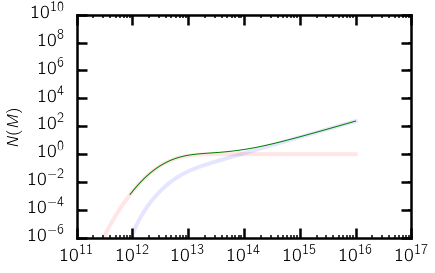

In [713]:
pylab.loglog(m , mean_central(m) , "r" , alpha = .1 , lw = 4.)
pylab.loglog(m , mean_satelite(m) , "b" , alpha = .1 , lw = 4.)
pylab.loglog(m , mean_central(m) + mean_satelite(m) , "g" , alpha = 1.)
pylab.ylabel("$N(M)$")
pylab.ylim((10**-6 , 10**10))

In [351]:
print model.param_dict["logM0"]

11.92


In [451]:
model = Zheng07(threshold = -21)

In [453]:
model.populate_mock()

In [556]:
nbar = []
for i in xrange(500):
     model.populate_mock()
     nbar.append(model.mock.number_density)

In [557]:
nbar = np.array(nbar)
np.savetxt("mock_nbar.dat" , nbar)

In [558]:
print np.mean(nbar)

0.000923547392


In [560]:
print np.var(nbar)

2.89344914063e-11


In [464]:
print model.param_dict
print model2.param_dict

{'logM0': 11.92, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.94}
{'logM0': 12.1, 'sigma_logM': 0.39, 'logMmin': 12.79, 'alpha': 1.15, 'logM1': 13.94}


In [515]:
np.diag(covariance)**.5

array([  2.78908955e+02,   1.10461732e+02,   4.59317956e+01,
         1.73593143e+01,   7.39104984e+00,   3.11251194e+00,
         1.16673341e+00,   4.42951738e-01,   1.64547834e-01,
         7.22927589e-02,   3.89318246e-02,   2.26200249e-02,
         1.20093890e-02,   7.65053435e-03])

In [516]:
np.savetxt("clustering_covariance.dat" , covariance)

In [518]:
model.mock.number_density

0.000929408

In [526]:
np.logspace(np.log10(1e12),np.log10(10) , 30)

array([  1.00000000e+12,   4.17531894e+11,   1.74332882e+11,
         7.27895384e+10,   3.03919538e+10,   1.26896100e+10,
         5.29831691e+09,   2.21221629e+09,   9.23670857e+08,
         3.85662042e+08,   1.61026203e+08,   6.72335754e+07,
         2.80721620e+07,   1.17210230e+07,   4.89390092e+06,
         2.04335972e+06,   8.53167852e+05,   3.56224789e+05,
         1.48735211e+05,   6.21016942e+04,   2.59294380e+04,
         1.08263673e+04,   4.52035366e+03,   1.88739182e+03,
         7.88046282e+02,   3.29034456e+02,   1.37382380e+02,
         5.73615251e+01,   2.39502662e+01,   1.00000000e+01])

In [551]:
dist= [[  9.34611722e+30 ,  1.19139184e+03],
 [  4.40717814e+32 ,  3.16556027e+03],
 [  6.97969451e+31 ,  3.61021871e+02],
 [  6.23476568e+28 ,  1.97302236e+04],
 [  3.05209675e+31 ,  1.10247217e+03]]
eps= [  1.00000000e+41 ,  1.00000000e+12]
dist = np.array(dist)


In [553]:
[(dist[i]<eps).all() for i in range(dist.shape[0])]

[True, True, True, True, True]

In [592]:
mean = np.mean(nbar)
var = np.var(nbar)

0.978275918821


In [571]:
mocks_xir = np.loadtxt("xir.dat")
data_xir = np.mean(mocks_xir , axis = 0)
covariance = np.loadtxt("clustering_covariance.dat")
cii = np.diag(covariance)

In [576]:
for i in range(200):
    model.populate_mock()
    n = model.mock.number_density
    chi1.append((n - mean)**2. / var)
    
    r , x = model.mock.compute_galaxy_clustering()
    chi2.append(np.sum((data_xir - x)**2. / cii))

In [585]:
np.median(np.array(chi1))

0.42059392849736243

In [584]:
np.median(np.array(chi2))

12.831631385845437

(array([  55.,  118.,   66.,   34.,   16.,    7.,    2.,    1.,    0.,    1.]),
 array([  3.1745792 ,   8.51949181,  13.86440442,  19.20931703,
         24.55422964,  29.89914225,  35.24405486,  40.58896747,
         45.93388008,  51.27879269,  56.6237053 ]),
 <a list of 10 Patch objects>)

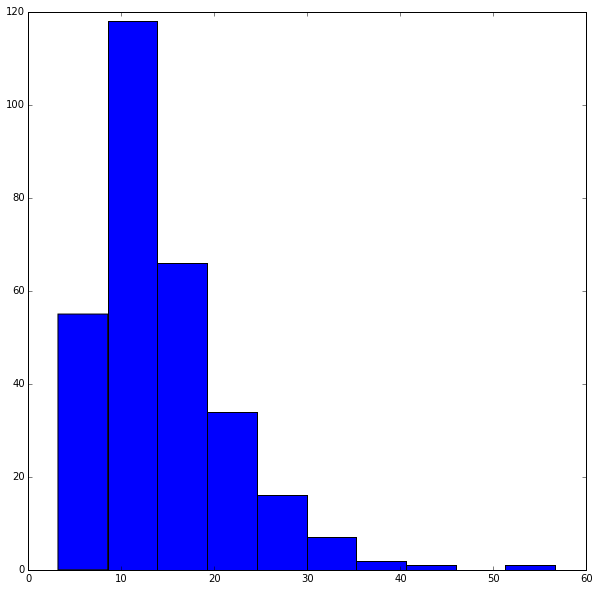

In [582]:
plt.hist(np.array(chi2))

(array([ 191.,   46.,   23.,   18.,    9.,    4.,    5.,    2.,    0.,    2.]),
 array([  4.63165447e-05,   7.59171743e-01,   1.51829717e+00,
          2.27742260e+00,   3.03654802e+00,   3.79567345e+00,
          4.55479888e+00,   5.31392430e+00,   6.07304973e+00,
          6.83217516e+00,   7.59130058e+00]),
 <a list of 10 Patch objects>)

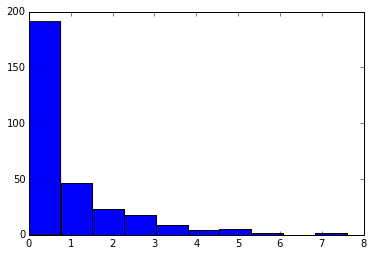

In [593]:
plt.hist(np.array(chi1))

In [594]:
print "the mean of clustering distances with the correct HOD = " , np.array(chi2).mean()
print "the mean of number density distances with the correct HOD = " , np.array(chi1).mean()


the mean of clustering distances with the correct HOD =  14.3684511307
the mean of number density distances with the correct HOD =  0.930518398615


In [605]:
model.populate_mock()
r , x = model.mock.compute_galaxy_clustering()
res = data_xir - x
%timeit np.dot(res , np.linalg.solve(covariance , res))
%timeit np.sum(res**2 / cii)

The slowest run took 4.02 times longer than the fastest. This could mean that an intermediate result is being cached 
10000 loops, best of 3: 26.9 µs per loop
The slowest run took 4.80 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 8.94 µs per loop


In [614]:
from halotools.mock_observables import wp

In [618]:
from halotools.mock_observables.clustering import tpcf

In [622]:
from halotools import mock_observables

In [629]:
from halotools.empirical_models.mock_helpers import (three_dim_pos_bundle,
                                                     infer_mask_from_kwargs)
from halotools.mock_observables.clustering import wp

In [630]:
rbins = model_defaults.default_rbins

In [631]:
rbin_centers = (rbins[1:] + rbins[0:-1])/2.

In [632]:
print rbins

[  0.1          0.1447819    0.209618     0.30348893   0.43939706
   0.63616743   0.92105532   1.33352143   1.93069773   2.79530095
   4.04708995   5.85945392   8.48342898  12.28247006  17.7827941 ]


In [633]:
from halotools.sim_manager import supported_sims

In [634]:
cat = supported_sims.HaloCatalog()

In [637]:
L = cat.Lbox
mask = infer_mask_from_kwargs(model.mock.galaxy_table)

In [638]:
pos = three_dim_pos_bundle(table=model.mock.galaxy_table,
                               key1='x', key2='y', key3='z', mask=mask,
                               return_complement=False)

In [690]:
clustering = wp(pos, rbins, p_bins , period = L)

In [687]:
print clustering.shape
print rbin_centers.shape
print L

(14,)
(14,)
250.0


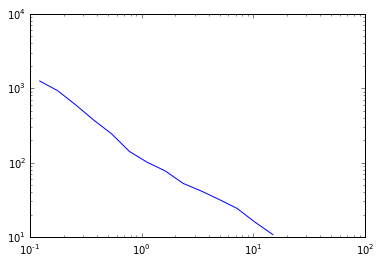

In [691]:
plot(rbin_centers , clustering)
plt.xscale("Log")
plt.yscale("Log")

In [689]:
p_bins = np.linspace(0,L/2,10)

In [694]:
pi_max  = np.linspace(2, L/2 , 10)
cl = []
for pi in pi_max:
    p_bins = np.linspace(0,pi,100)
    clustering = wp(pos, rbins, p_bins , period = L)
    cl.append(clustering)

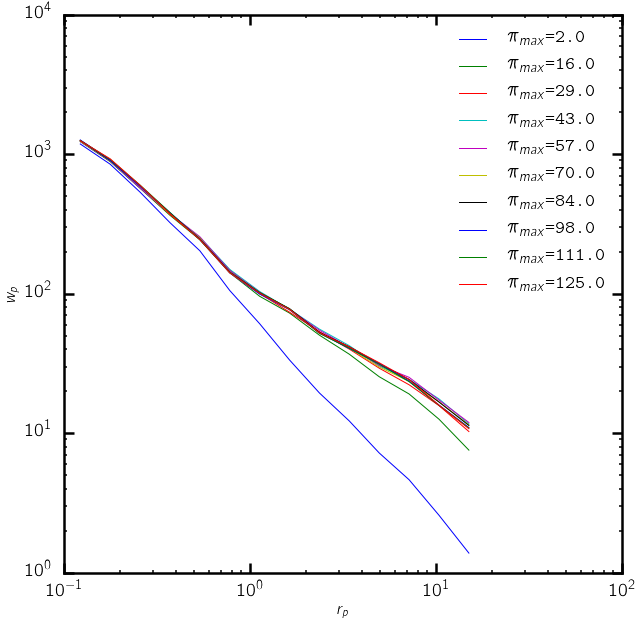

In [750]:
figure = plt.figure(figsize = (10,10))
for i in range(0,10):
    plot(rbin_centers , cl[i] , label = "$\pi_{max}$="+str(round(pi_max[i])))
    #plot(rbin_centers , cl[i] , label = "$\pi_{max}$={0:.2f}".format(pi_max[i]))
    
    plt.ylabel("$w_p$")
    plt.xlabel("$r_p$")
    plt.xscale("Log")
    plt.yscale("Log")
    plt.legend()

In [732]:
binsize = np.logspace(1,3,20)
cl2 = []
for bsize in binsize:
    p_bins = np.linspace(0,125,bsize)
    clustering = wp(pos, rbins, p_bins , period = L)
    cl2.append(clustering)

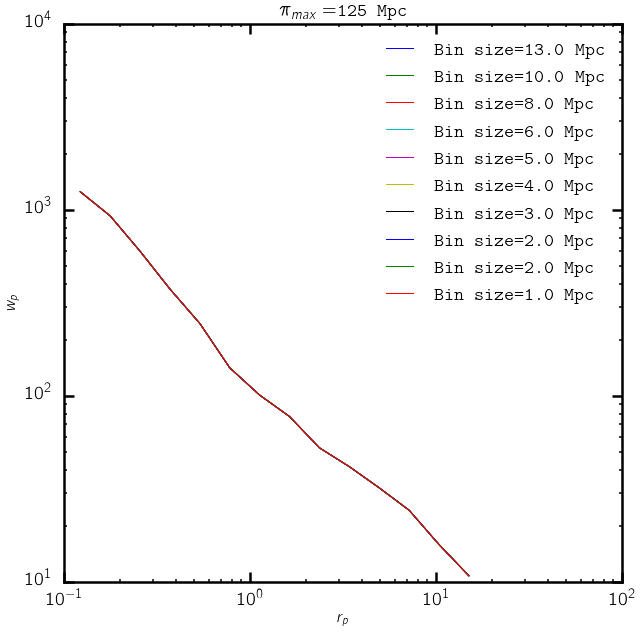

In [754]:
figure = plt.figure(figsize = (10,10))
for i in range(0,10):
    plot(rbin_centers , cl2[i] , label = "Bin size="+str(round(125/binsize[i]))+" Mpc")
    #plot(rbin_centers , cl[i] , label = "$\pi_{max}$={0:.2f}".format(pi_max[i]))
    plt.title("$\pi_{max}=$"+str(125)+" Mpc")

    plt.ylabel("$w_p$")
    plt.xlabel("$r_p$")
    plt.xscale("Log")
    plt.yscale("Log")
    plt.legend()

In [739]:
binsize = np.logspace(1,3,20)
cl3 = []
for bsize in binsize:
    p_bins = np.linspace(0,50,bsize)
    clustering = wp(pos, rbins, p_bins , period = L)
    cl3.append(clustering)

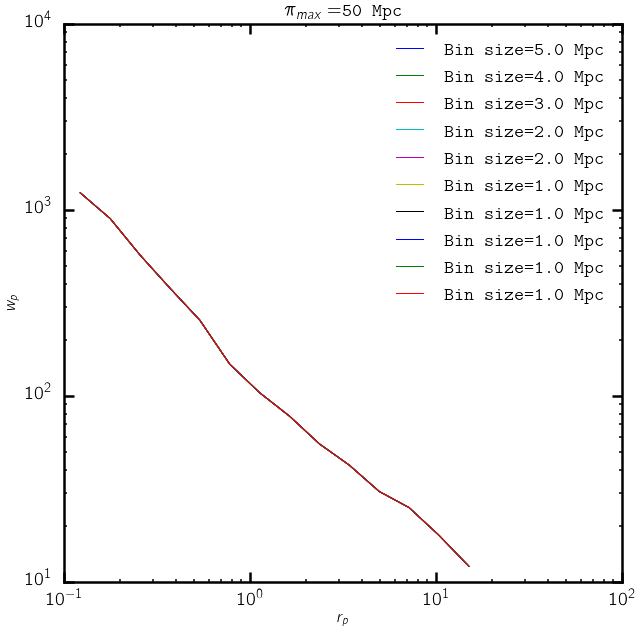

In [772]:
figure = plt.figure(figsize = (10,10))
for i in range(0,10):
    plot(rbin_centers , cl3[i] ,label = "Bin size="+str(round(50/binsize[i]))+" Mpc")
    #plot(rbin_centers , cl[i] , label = "$\pi_{max}$={0:.2f}".format(pi_max[i]))
    plt.title("$\pi_{max}=$"+str(50)+" Mpc")
    plt.ylabel("$w_p$")
    plt.xlabel("$r_p$")
    plt.xscale("Log")
    plt.yscale("Log")
    plt.legend()

In [786]:
model.populate_mock()
pos = three_dim_pos_bundle(table=model.mock.galaxy_table,
                               key1='x', key2='y', key3='z', mask=mask,
                               return_complement=False)
pbins = np.linspace(0 , 125 , 50)
clustering = wp(pos, rbins, p_bins , period = L)

IndexError: index 14330 is out of bounds for axis 1 with size 14330

In [770]:
from halotools.mock_observables import s_mu_tpcf

In [769]:
#s_bins = np.logspace(-2,-1,10)
#mu_bins = np.linspace(0,1,50)
#xis = s_mu_tpcf(pos, s_bins, mu_bins, period=L)

In [927]:
wp_list = []
p_bins = np.linspace(0,125,100)
for i in range(500):
    model.populate_mock()
    pos = three_dim_pos_bundle(table=model.mock.galaxy_table,
                               key1='x', key2='y', key3='z')
    wp_list.append(wp(pos, rbins, p_bins , period = np.array([L,L,L])))

In [926]:
import time
a = time.time()
#pos = three_dim_pos_bundle(table=model.mock.galaxy_table,key1='x', key2='y', key3='z' ,return_complement=False)
#wp(pos, rbins, pi_bins , period = np.array([L,L,L]))
model.mock.compute_galaxy_clustering()
print time.time() - a

1.4071688652


In [921]:
pi_bins = np.linspace(0,125,200)
d1 = wp(pos, rbins, pi_bins , period = np.array([L,L,L]))

In [922]:
pi_bins = np.linspace(0,125,100)
%timeit d2 = wp(pos, rbins, pi_bins , period = np.array([L,L,L]))

1 loops, best of 3: 903 ms per loop


In [929]:
wps = np.array(wp_list)

In [931]:
wp_cov = np.cov(wps.T)

<matplotlib.colorbar.Colorbar instance at 0x7fb6f43e9e60>

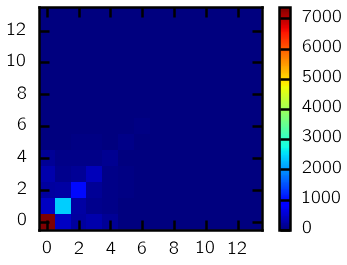

In [937]:
imshow(wp_cov , interpolation = "None" , origin = "lower")
colorbar()

In [938]:
np.savetxt("wps.dat" , wps)
np.savetxt("wp_covariance.dat" , wp_cov)

In [946]:
data_wp = np.mean(wps , axis = 0) 
cii = np.diag(wp_cov)
chi3 = []
for i in range(500):
    #model.populate_mock()
    #pos = three_dim_pos_bundle(table=model.mock.galaxy_table,
    #                           key1='x', key2='y', key3='z')
    #wp_list.append(wp(pos, rbins, p_bins , period = np.array([L,L,L])))
    
    #r , x = model.mock.compute_galaxy_clustering()
    chi3.append(np.sum((data_wp - wps[i])**2. / cii))

In [947]:
np.array(chi3).mean()

13.972000000000003